## Combine All CSV Files into One Dataset



In [9]:
import pandas as pd
import glob

# Combine all CSV files from the MachineLearningCSV folder
path = "C:\\Users\\ferdo\\Desktop\\Project- AI-Based Threat Detection System on Azure\\CICIDS2017 DATASET\\MachineLearningCSV\\MachineLearningCSV\\MachineLearningCVE\\"
all_files = glob.glob(path + "*.csv")
print(f"Found {len(all_files)} files to combine.")

# Merge all files into one DataFrame
df_combined = pd.concat((pd.read_csv(file) for file in all_files), ignore_index=True)

# Save the combined dataset
df_combined.to_csv("combined_ddos_dataset.csv", index=False)
print(f"Combined dataset shape: {df_combined.shape}")

Found 8 files to combine.
Combined dataset shape: (2830743, 79)


## Load and Explore the Combined Dataset

In [10]:
# Load the combined dataset
file_path = "combined_ddos_dataset.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
print(df.head())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for columns with only zeros
print("\nColumns with only zeros:")
zero_only_columns = df.columns[(df == 0).all()]
print(zero_only_columns)


    Destination Port   Flow Duration   Total Fwd Packets  \
0              54865               3                   2   
1              55054             109                   1   
2              55055              52                   1   
3              46236              34                   1   
4              54863               3                   2   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        0                           12   
1                        1                            6   
2                        1                            6   
3                        1                            6   
4                        0                           12   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       6   
1                             6                       6   
2                             6                       6   
3                             6                 

## Drop Redundant Columns and Save Cleaned Dataset

In [11]:
# Drop unnecessary columns (columns with all zeros)
columns_to_drop = list(zero_only_columns)
df_cleaned = df.drop(columns=columns_to_drop)

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_ddos_dataset.csv", index=False)
print("Cleaned dataset saved as cleaned_ddos_dataset.csv")

# Check class distribution
print("\nClass Distribution:")
print(df_cleaned[' Label'].value_counts())

Cleaned dataset saved as cleaned_ddos_dataset.csv

Class Distribution:
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


## Visualize Class Distribution

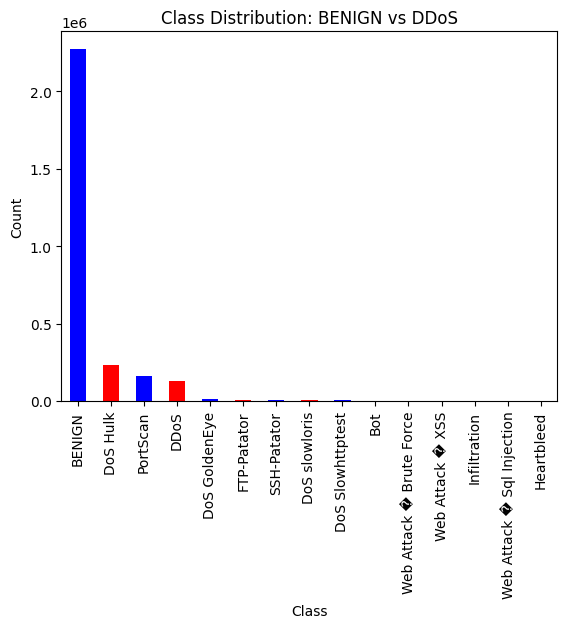

In [5]:
import matplotlib.pyplot as plt

# Plot class distribution
class_counts = df_cleaned[' Label'].value_counts()
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution: BENIGN vs DDoS")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


## Correlation Heatmap to Identify Redundant Features

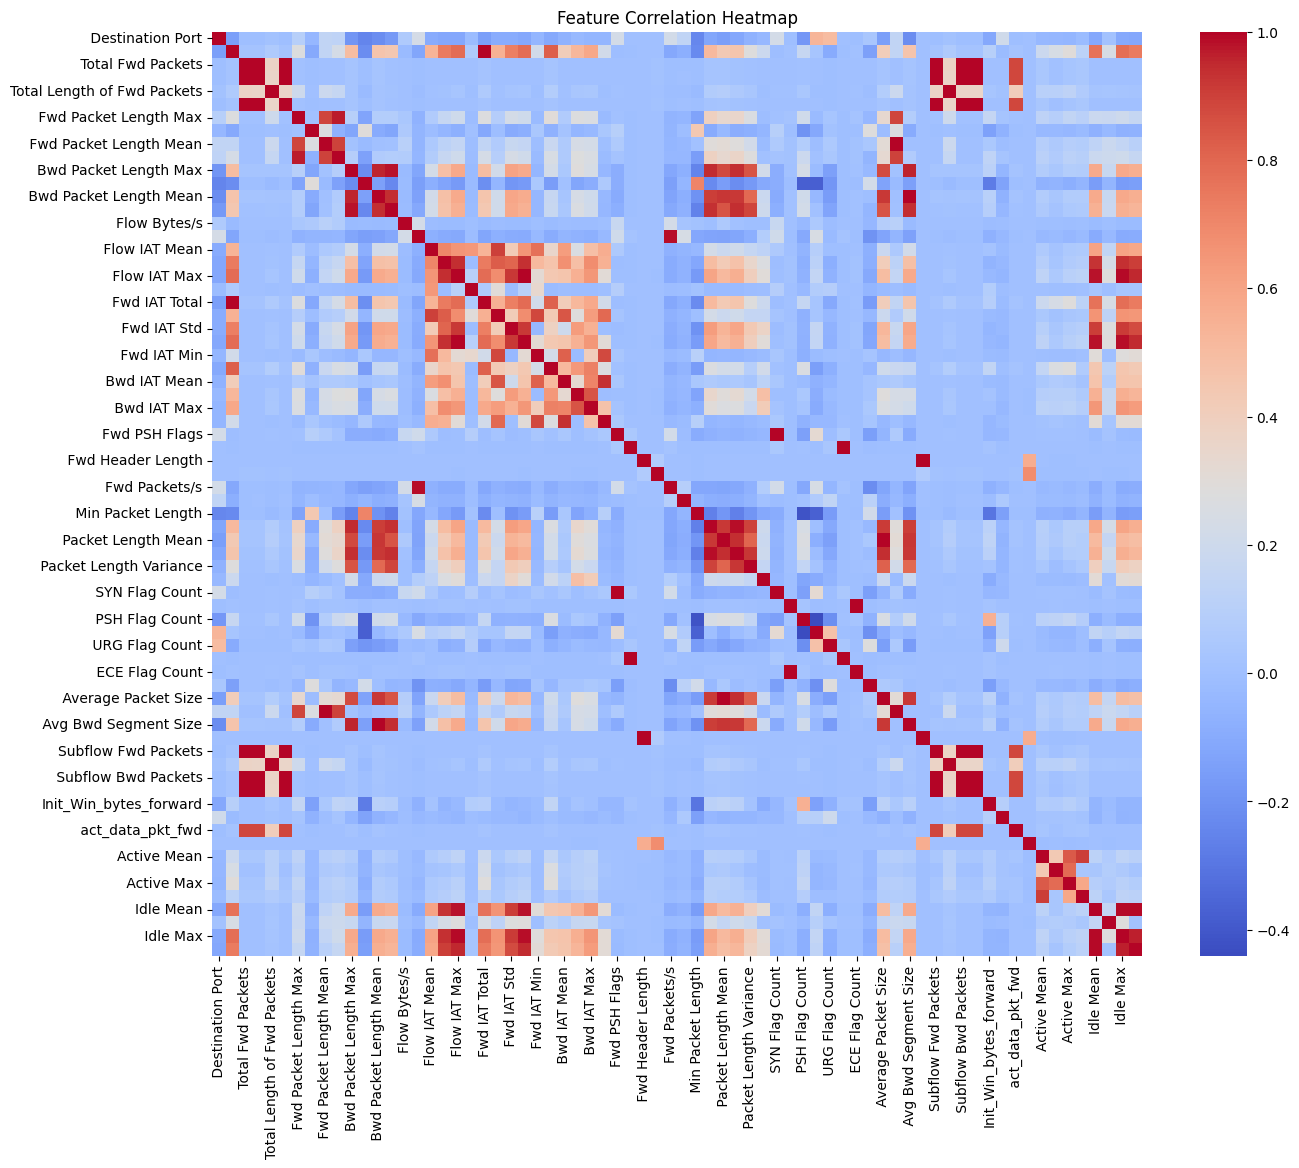

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_ddos_dataset.csv")

# Drop the Label column for correlation calculation
numeric_df = df_cleaned.drop(columns=[" Label"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



## Drop Highly Correlated Features

In [7]:
# List of redundant features (determined manually from the heatmap)
redundant_features = [
    ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Max', ' Idle Max',
    ' Total Backward Packets', ' Total Length of Bwd Packets', 
    ' Fwd Header Length', ' Bwd Header Length', ' Fwd Header Length.1', 
    ' Subflow Bwd Packets', ' Subflow Bwd Bytes', 
    ' Fwd Packet Length Mean', ' Fwd Packet Length Std', ' Avg Fwd Segment Size',
    ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Avg Bwd Segment Size',
    ' Flow IAT Std', ' Fwd IAT Std', ' Idle Mean', 
    ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance',
    ' Average Packet Size', ' Active Max', ' Active Min'
]

# Drop features that exist in the current dataset
features_to_drop = [feature for feature in redundant_features if feature in df_cleaned.columns]
df_cleaned = df_cleaned.drop(columns=features_to_drop)

# Save the final cleaned dataset
df_cleaned.to_csv("final_ddos_cleaned_dataset.csv", index=False)
print("Final cleaned dataset saved as final_ddos_cleaned_dataset.csv")


Final cleaned dataset saved as final_ddos_cleaned_dataset.csv


## Split Data into Training and Testing Sets

In [13]:
import pandas as pd

# Load the cleaned dataset
file_path = "C:\\Users\\ferdo\\final_ddos_cleaned_dataset.csv"  # Adjust path if needed
df_cleaned = pd.read_csv(file_path)

# Print all feature names
print(df_cleaned.columns.tolist())


C:\Users\ferdo\AppData\Local\Temp\ipykernel_27604\188103830.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[' Destination Port', ' Flow Duration', ' Total Fwd Packets', 'Total Length of Fwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', 'Bwd Packet Length Max', ' Bwd Packet Length Min', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Min', ' Fwd IAT Mean', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Fwd URG Flags', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward', ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean', ' Active Std', 'Idle Mean', ' Idle Std', ' Idle Min', ' Label']


In [8]:
from sklearn.model_selection import train_test_split

# Load the final cleaned dataset
df_cleaned = pd.read_csv("final_ddos_cleaned_dataset.csv")

# Split features (X) and target (y)
X = df_cleaned.drop(columns=[' Label'])
y = df_cleaned[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training Set: X_train = (2264594, 45), y_train = (2264594,)
Testing Set: X_test = (566149, 45), y_test = (566149,)


## Handle Missing and Infinite Values

In [9]:
import numpy as np

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill missing values with the column mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

# Confirm that there are no more infinities or NaNs
print("After handling infinities and NaNs:")
print(f"X_train has NaNs: {X_train.isnull().any().any()}")
print(f"X_test has NaNs: {X_test.isnull().any().any()}")



After handling infinities and NaNs:
X_train has NaNs: False
X_test has NaNs: False


## Train and Evaluate the Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.9953

Classification Report:


C:\Users\ferdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ferdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ferdo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                            precision    recall  f1-score   support

                    BENIGN       0.99      1.00      1.00    454620
                       Bot       1.00      0.01      0.01       393
                      DDoS       1.00      1.00      1.00     25606
             DoS GoldenEye       1.00      0.78      0.87      2059
                  DoS Hulk       1.00      0.99      0.99     46215
          DoS Slowhttptest       0.99      0.94      0.96      1100
             DoS slowloris       1.00      0.92      0.96      1159
               FTP-Patator       1.00      1.00      1.00      1588
                Heartbleed       1.00      1.00      1.00         2
              Infiltration       0.00      0.00      0.00         7
                  PortScan       0.99      1.00      1.00     31786
               SSH-Patator       1.00      0.76      0.87      1179
  Web Attack � Brute Force       0.00      0.00      0.00       301
Web Attack � Sql Injection       0.00      0.00

## Analyze Feature Importance

Top 10 Important Features:
                        Feature  Importance
6         Bwd Packet Length Max    0.096072
24            Max Packet Length    0.081506
35            Subflow Fwd Bytes    0.060367
0              Destination Port    0.055142
3   Total Length of Fwd Packets    0.052220
37      Init_Win_bytes_backward    0.042849
9                Flow Packets/s    0.042399
12                 Fwd IAT Mean    0.037241
4         Fwd Packet Length Max    0.036221
7         Bwd Packet Length Min    0.034155


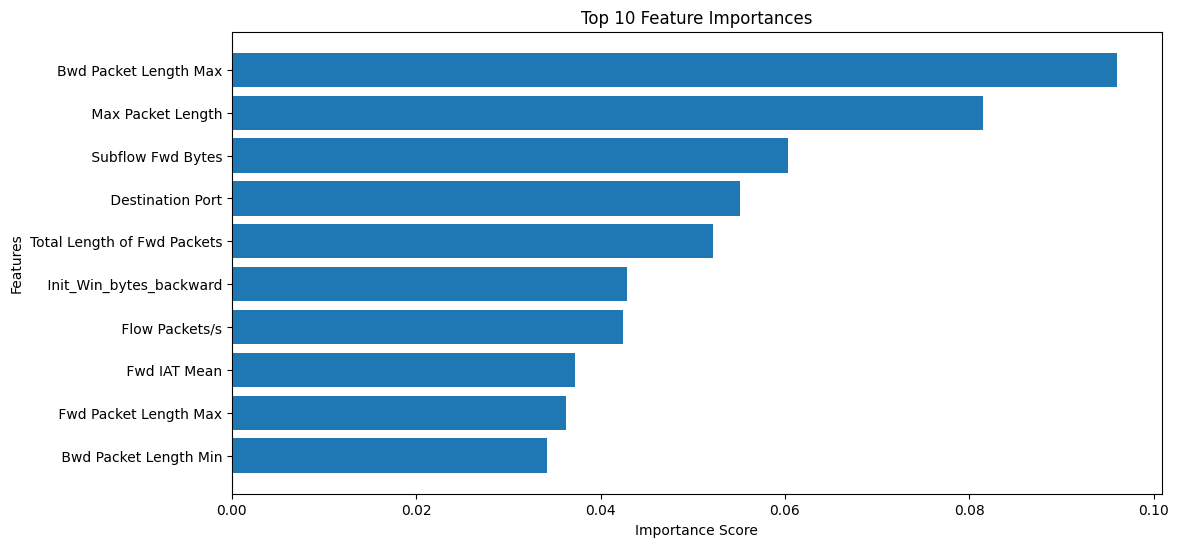

In [11]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display and plot top 10 features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [12]:
## Save the ML model locally

import joblib

# Save the trained Random Forest model
model_filename = "random_forest_ddos_model.pkl"
joblib.dump(rf_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as random_forest_ddos_model.pkl


In [12]:
pip install azureml-core azureml-sdk

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install azure-cli --upgrade


     ---------------------------------------- 0.0/46.5 kB ? eta -:--:--
     ---------------------------------------- 46.5/46.5 kB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/69.4 kB ? eta -:--:--
     ---------------------------------------- 69.4/69.4 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/53.7 kB ? eta -:--:--
     ---------------------------------------- 53.7/53.7 kB ? eta 0:00:00
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     -------------------------------------- 108.2/108.2 kB 6.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/73.0 kB ? eta -:--:--
     ---------------------------------------- 73.0/73.0 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 0.0/87.3 kB ? eta -:--:--
     ---------------------------------------- 87.3/87.3 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/14.3 MB ? eta -:--:--
   - -------------------

In [5]:
##Set Up the Azure ML Environment
from azureml.core.environment import Environment
from azureml.core.model import InferenceConfig

# Define the Azure ML environment
env = Environment(name="ddos-detection-env")
env.python.conda_dependencies.add_pip_package("pandas")
env.python.conda_dependencies.add_pip_package("scikit-learn")

# Define the inference configuration
inference_config = InferenceConfig(
    entry_script="score.py",  # Path to your scoring script
    environment=env          # The environment defined above
)

print("Environment and inference configuration are ready!")



Environment and inference configuration are ready!


In [10]:
## re-deploy 

from azureml.core.model import Model

# List all registered models in the workspace
models = Model.list(workspace=ws)
for m in models:
    print(f"Name: {m.name}, Version: {m.version}")

Name: ddos-detection-model, Version: 1


In [11]:
# Load the registered model
model = Model(workspace=ws, name="ddos-detection-model")
print(f"Model loaded: {model.name}, Version: {model.version}")


Model loaded: ddos-detection-model, Version: 1


In [13]:
from azureml.core.webservice import Webservice

# Get the existing service
existing_service = Webservice(workspace=ws, name="ddos-detection-service")

# Delete the service
existing_service.delete()
print("Existing service deleted.")



Running
2024-12-18 05:55:39-05:00 Check and wait for operation (b178a889-79a0-4480-8da1-b453c99be4aa) to finish.
2024-12-18 05:55:41-05:00 Deleting service entity.
Succeeded
Existing service deleted.


In [15]:
!python --version


Python 3.11.7


In [16]:
pip install ipykernel


Note: you may need to restart the kernel to use updated packages.
